In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

In [2]:
df_airlines=pd.read_csv('airlines.csv')

In [3]:
df_airports=pd.read_csv('airports.csv')

In [4]:
df=pd.read_csv('flights.csv')

/var/folders/k_/56n9wl_j531_w664x6r2v8l00000gn/T/ipykernel_22007/82286611.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('flights.csv')


In [5]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
df['FL_DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [8]:
df['DELAYED'] = df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 15 else 0)

<Axes: title={'center': 'Average Delay Rate per Airline'}, xlabel='AIRLINE'>

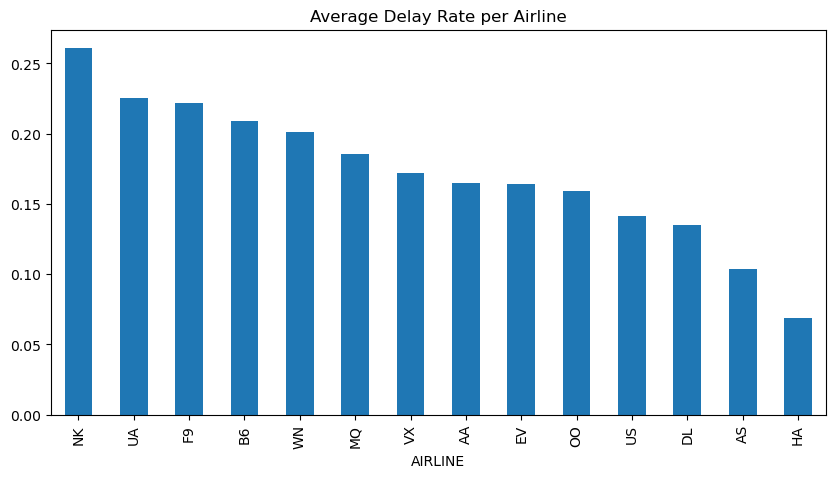

In [9]:
delay_by_airline = df.groupby('AIRLINE')['DELAYED'].mean().sort_values(ascending=False)
delay_by_airline.plot(kind='bar', figsize=(10,5), title='Average Delay Rate per Airline')

<Axes: title={'center': 'Reasons for Cancellation'}, xlabel='CANCELLATION_REASON'>

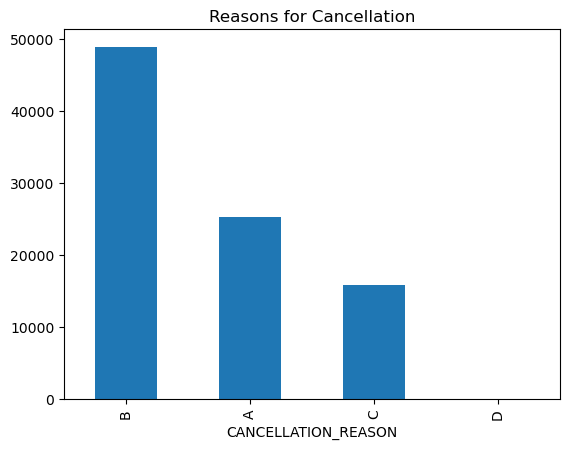

In [10]:
df['CANCELLATION_REASON'].value_counts().plot(kind='bar', title='Reasons for Cancellation')

<Axes: title={'center': 'Delay Rate by Month'}, xlabel='MONTH'>

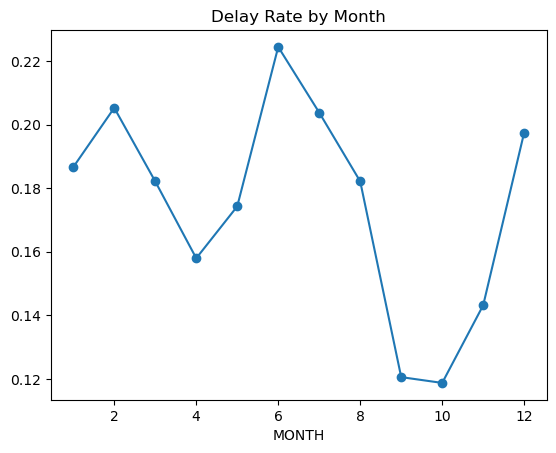

In [11]:
df.groupby('MONTH')['DELAYED'].mean().plot(kind='line', marker='o', title='Delay Rate by Month')

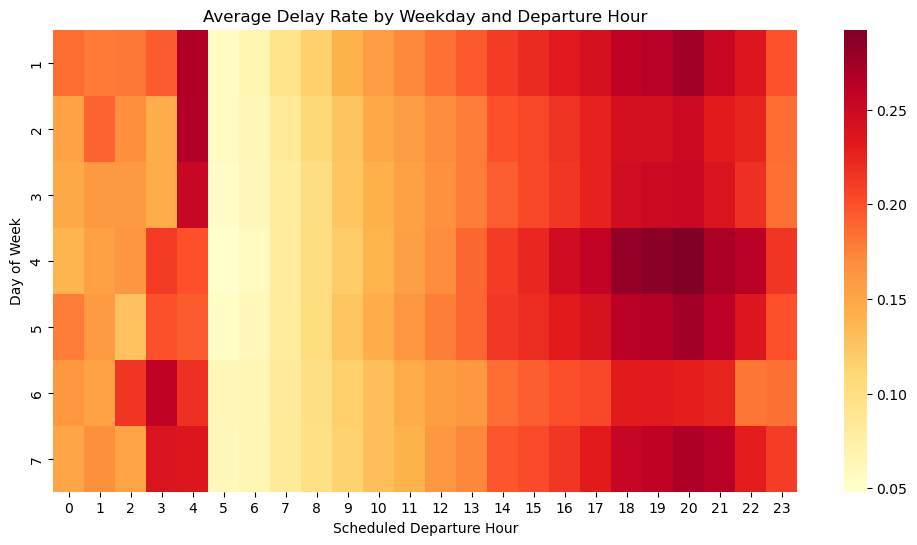

In [12]:
df['SCHED_DEP_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100
pivot = df.pivot_table(index='DAY_OF_WEEK', columns='SCHED_DEP_HOUR', values='DELAYED', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlOrRd", annot=False)
plt.title("Average Delay Rate by Weekday and Departure Hour")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Day of Week")
plt.show()

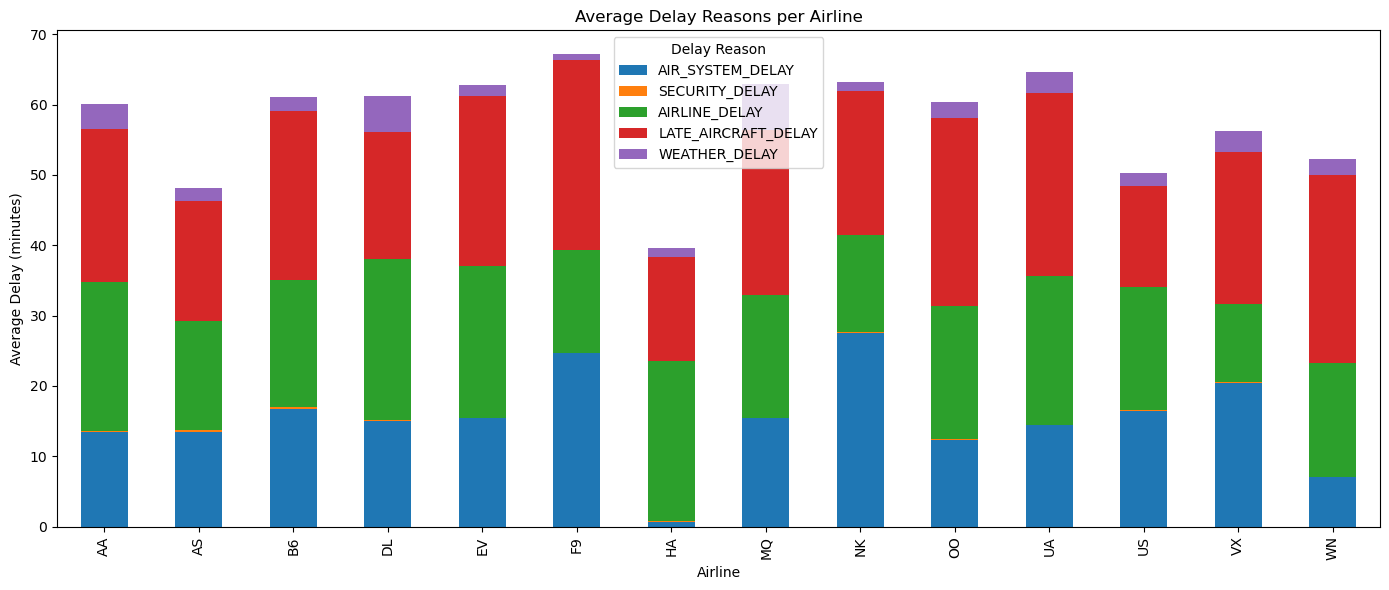

In [13]:
reason_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
df_reason = df.groupby('AIRLINE')[reason_cols].mean()

df_reason.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Average Delay Reasons per Airline")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Airline")
plt.legend(title="Delay Reason")
plt.tight_layout()
plt.show()

In [14]:
df_airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [15]:
df_airports = df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']]
df_airports.columns = ['ORIGIN_AIRPORT', 'LAT', 'LON']

In [16]:
airport_delay = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
airport_delay = airport_delay.merge(df_airports, on='ORIGIN_AIRPORT', how='left')
airport_delay['ABS_DELAY'] = airport_delay['DEPARTURE_DELAY'].abs()
airport_delay_clean = airport_delay.dropna(subset=['LAT', 'LON', 'ABS_DELAY'])

In [17]:
fig = px.scatter_geo(
    airport_delay_clean,
    lat='LAT',
    lon='LON',
    hover_name='ORIGIN_AIRPORT',
    size='ABS_DELAY',
    color='DEPARTURE_DELAY',  # actual delay for color
    color_continuous_scale='RdYlGn_r',  # colorful and intuitive
    scope='usa',
    title='Average Departure Delay by Airport'
)
fig.show()

In [18]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FL_DATE,DELAYED,SCHED_DEP_HOUR
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0


In [81]:

airport_delay.to_csv("airport_delay_with_coords.csv", index=False)